In [2]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Packages imported successfully!")

Packages imported successfully!


In [3]:
# Cell 2: Load Dataset
df = pd.read_csv('../dataCollection/all_filtered_markets_full_2024_2025.csv')

# Convert closingDate to datetime - handle ISO8601 format with microseconds and timezone
# Use format='mixed' to handle varying datetime formats, or let pandas infer automatically
df['closingDate'] = pd.to_datetime(df['closingDate'], format='mixed', errors='coerce')

# Convert outcome to boolean - handle various formats
def convert_outcome(value):
    """Convert outcome value to boolean, handling various input formats"""
    # Handle NaN/None first
    if pd.isna(value) or value is None:
        return None
    
    # If already boolean, return as-is
    if isinstance(value, bool):
        return value
    
    # Handle numeric types (int, float, numpy types)
    try:
        if isinstance(value, (int, float, np.integer, np.floating)):
            if value == 1 or value == 1.0:
                return True
            elif value == 0 or value == 0.0:
                return False
            else:
                return None
    except:
        pass
    
    # Handle string types
    if isinstance(value, str):
        value_lower = value.lower().strip()
        if value_lower in ['true', '1', 'yes', 't']:
            return True
        elif value_lower in ['false', '0', 'no', 'f']:
            return False
        else:
            return None
    
    # For any other type, try to convert to string and check
    try:
        value_str = str(value).lower().strip()
        if value_str in ['true', '1', 'yes', 't']:
            return True
        elif value_str in ['false', '0', 'no', 'f']:
            return False
    except:
        pass
    
    return None

# Check original outcome dtype and sample values before conversion
print(f"Original outcome dtype: {df['outcome'].dtype}")
print(f"Original outcome sample values: {df['outcome'].head(10).tolist()}")
print(f"Original outcome unique values: {df['outcome'].unique()}")

df['outcome'] = df['outcome'].apply(convert_outcome)

# Ensure no duplicates by deduplicating by clobID
df = df.drop_duplicates(subset=["clobID"]).reset_index(drop=True)

# Convert outcome to int for calculations (True=1, False=0, NaN stays NaN)
# Only convert non-null values, use nullable integer type
df['outcome_int'] = df['outcome'].apply(lambda x: 1 if x is True else (0 if x is False else None)).astype('Int64')

# Report on outcome completeness
outcome_complete = df['outcome'].notna().sum()
outcome_missing = len(df) - outcome_complete
print(f"\nAfter conversion:")
print(f"  Outcome dtype: {df['outcome'].dtype}")
print(f"  Outcome sample values: {df['outcome'].head(10).tolist()}")
print(f"  Outcome unique values: {df['outcome'].unique()}")
print(f"\nDataset loaded: {len(df)} markets")
print(f"Date range: {df['closingDate'].min()} to {df['closingDate'].max()}")
print(f"\nOutcome data: {outcome_complete} complete, {outcome_missing} missing")
print(f"\nColumns: {list(df.columns)}")

# Show data completeness for probability columns
print("\nData completeness:")
prob_cols = ['probability7d', 'probability6d', 'probability5d', 'probability4d', 
             'probability3d', 'probability2d', 'probability1d']
for col in prob_cols:
    if col in df.columns:
        complete = df[col].notna().sum()
        print(f"  {col}: {complete}/{len(df)} ({100*complete/len(df):.1f}%)")

# Count markets with complete 7-day data
all_complete = df[prob_cols].notna().all(axis=1).sum()
print(f"\nMarkets with complete 7-day data: {all_complete}/{len(df)} ({100*all_complete/len(df):.1f}%)")

# Count markets with both complete 7-day data AND outcome
complete_with_outcome = df[prob_cols + ['outcome']].notna().all(axis=1).sum()
print(f"Markets with complete 7-day data AND outcome: {complete_with_outcome}/{len(df)} ({100*complete_with_outcome/len(df):.1f}%)")

print(f"\nFirst few rows:")
df.head()


Original outcome dtype: object
Original outcome sample values: [True, True, True, True, True, True, True, True, True, True]
Original outcome unique values: [True False nan]

After conversion:
  Outcome dtype: object
  Outcome sample values: [True, True, True, True, True, True, True, True, True, True]
  Outcome unique values: [True False None]

Dataset loaded: 4264 markets
Date range: 2024-01-13 00:00:00+00:00 to 2025-12-25 17:30:00+00:00

Outcome data: 4261 complete, 3 missing

Columns: ['market', 'slug', 'clobID', 'closingDate', 'outcome', 'probability7d', 'probability6d', 'probability5d', 'probability4d', 'probability3d', 'probability2d', 'probability1d', 'volume', 'outcome_int']

Data completeness:
  probability7d: 4230/4264 (99.2%)
  probability6d: 4248/4264 (99.6%)
  probability5d: 4249/4264 (99.6%)
  probability4d: 4250/4264 (99.7%)
  probability3d: 4254/4264 (99.8%)
  probability2d: 4256/4264 (99.8%)
  probability1d: 4261/4264 (99.9%)

Markets with complete 7-day data: 4230/4264

,market,slug,clobID,closingDate,outcome,probability7d,probability6d,probability5d,probability4d,probability3d,probability2d,probability1d,volume,outcome_int
0,Taiwan Presidential Election: Will Ko Wen-je win?,taiwan-presidential-election-will-ko-wen-je-win,8962477137361394664796549583729682747725386423...,2024-01-13 00:00:00+00:00,True,0.840,0.780,0.750,0.7050,0.6750,0.7400,0.840,1356952.12,1
1,Taiwan Presidential Election: Will Lai Ching-t...,taiwan-presidential-election-will-lai-ching-te...,9866196699718073163372437464735060735691124916...,2024-01-13 00:00:00+00:00,True,0.750,0.745,0.695,0.6600,0.6250,0.7250,0.745,1809553.58,1
2,Taiwan Presidential Election: Will Hou Yu-ih win?,taiwan-presidential-election-will-hou-yu-ih-win,1084154628187446890163067717122883538813848217...,2024-01-13 00:00:00+00:00,True,0.875,0.890,0.895,0.8700,0.8800,0.8550,0.855,620031.71,1
3,Who will get more votes in Taiwan Election: Ho...,who-will-get-more-votes-in-taiwan-election-hou...,1272797331412072655672391590820161519555390243...,2024-01-13 00:00:00+00:00,True,0.645,0.590,0.525,0.5150,0.6050,0.5400,0.710,849344.72,1
4,Will there be a US government shutdown by Jan 20?,will-there-be-a-us-government-shutdown-by-jan-20,9166525427870154856870613992402270242829489715...,2024-01-20 00:00:00+00:00,True,0.805,0.895,0.945,0.9705,0.9505,0.9815,0.995,124889.43,1


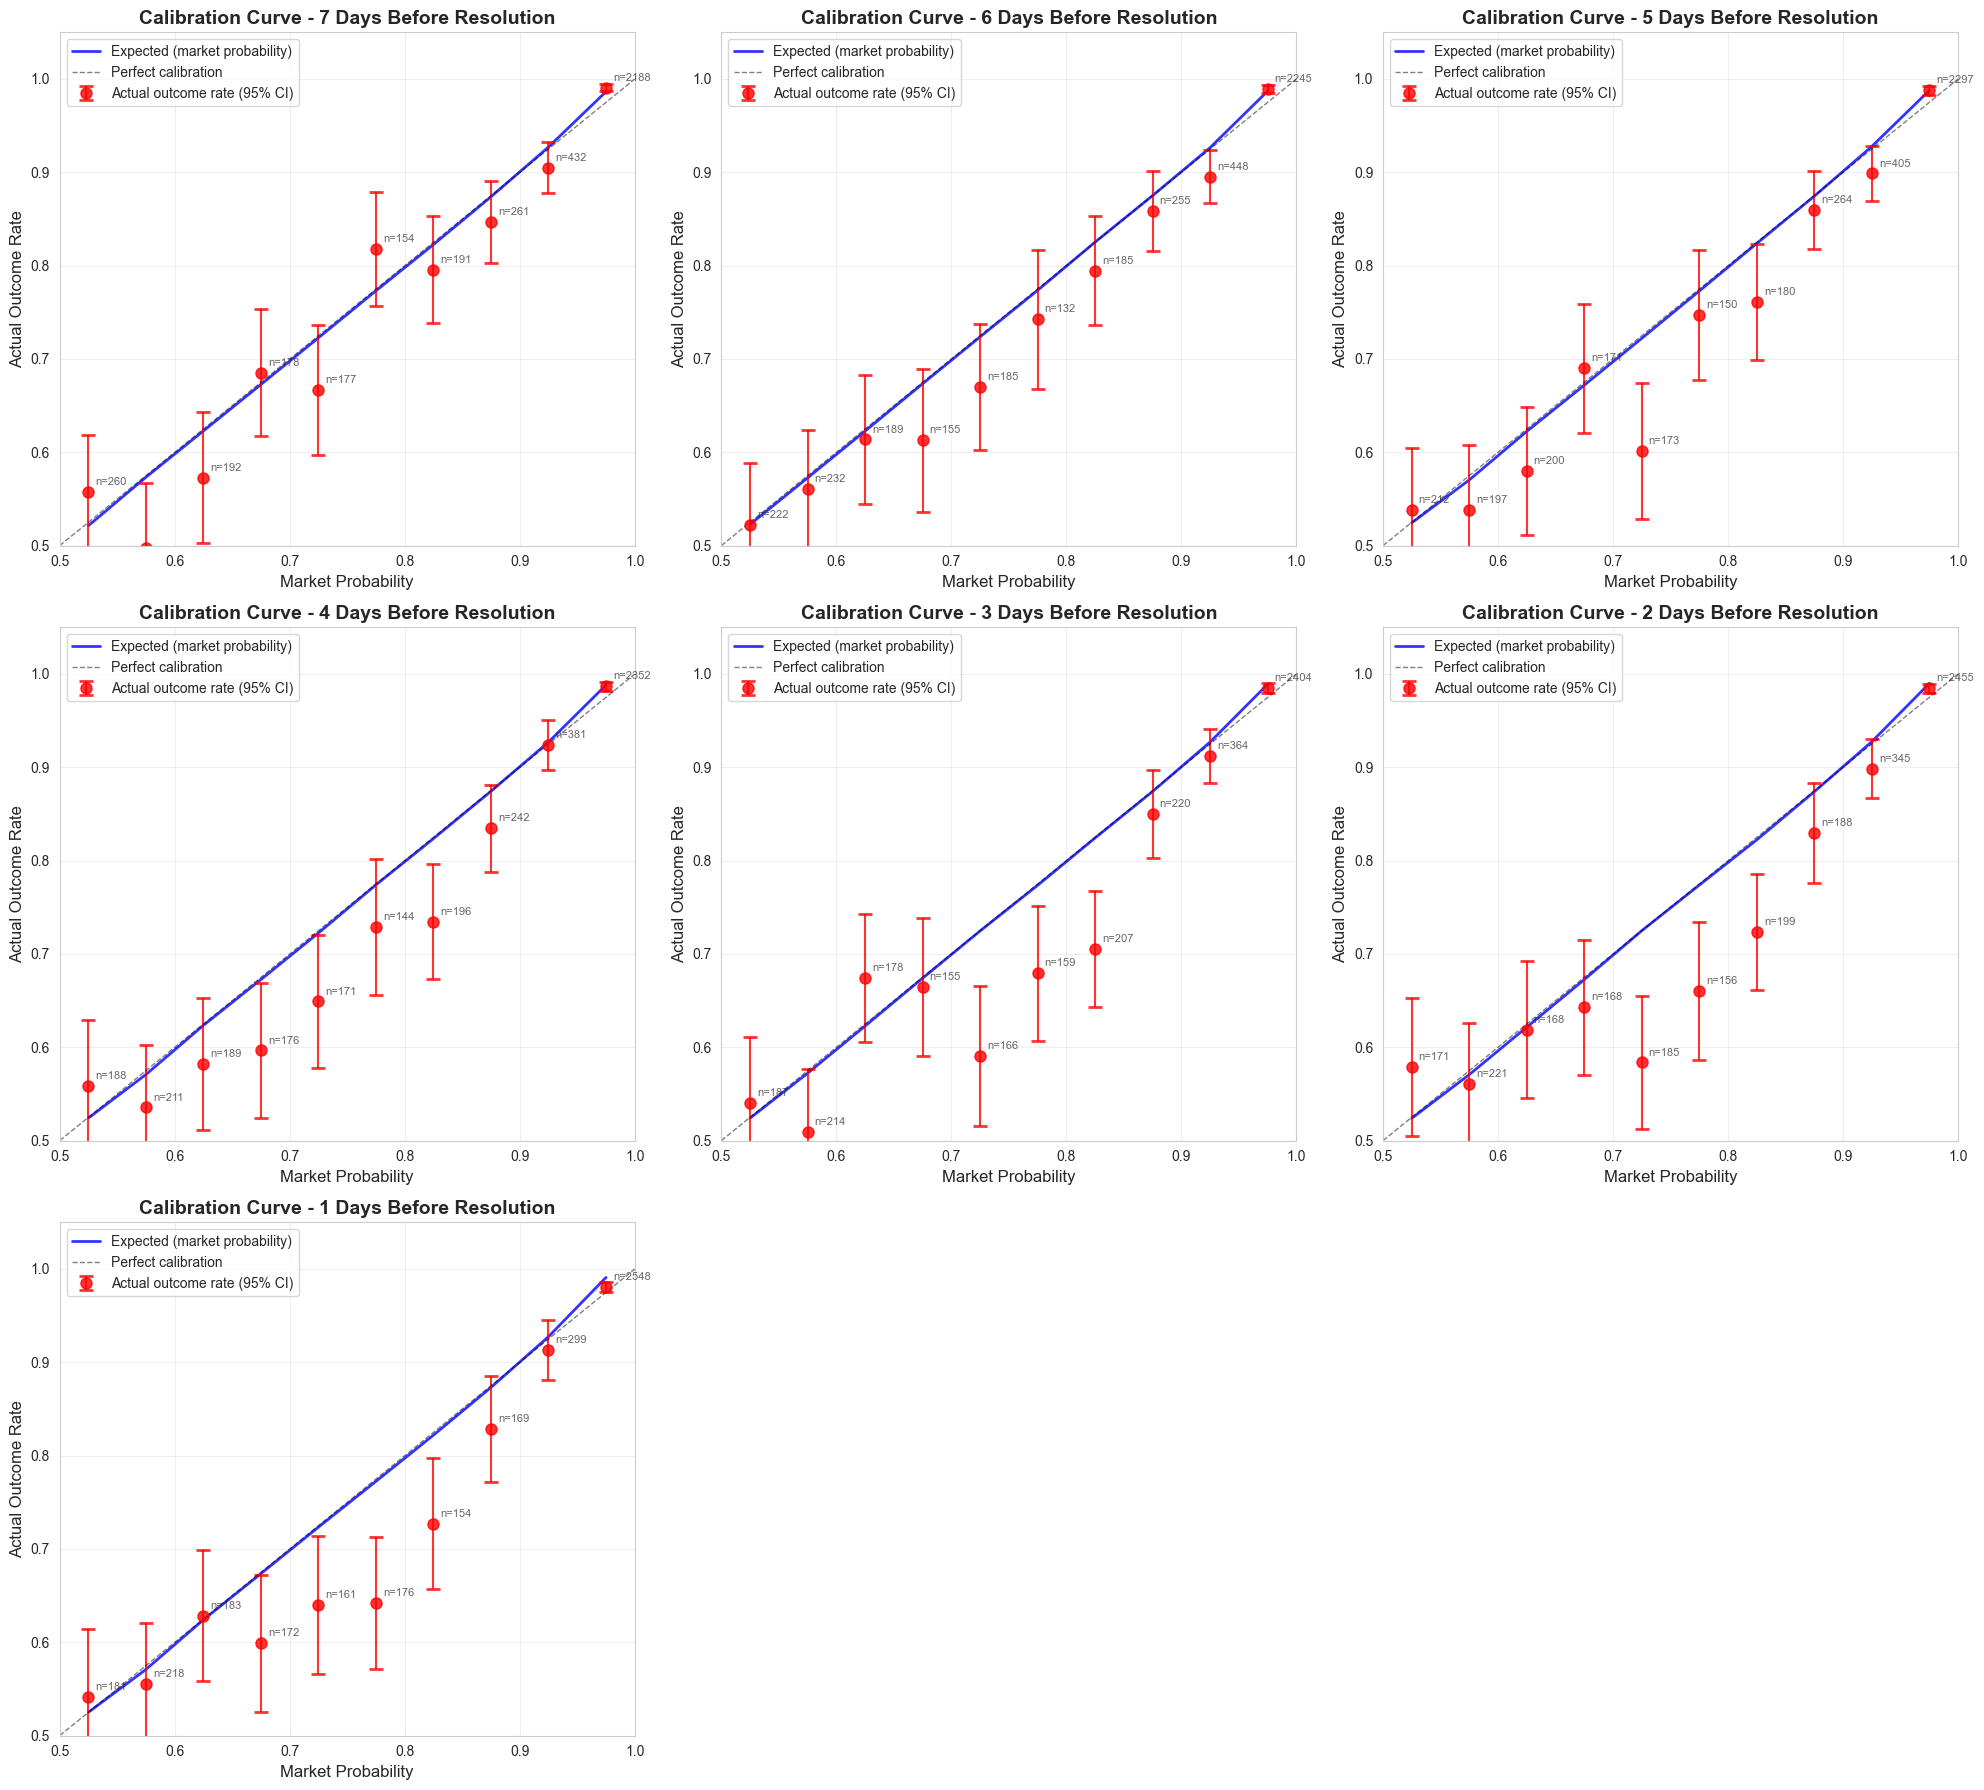

Calibration Summary by Day:

7 Days Before Resolution:
  Total markets: 4230
  Bands with data: 10
  Weighted avg expected rate: 0.8697
  Overall actual rate: 0.8631
  Difference: -0.0066

6 Days Before Resolution:
  Total markets: 4248
  Bands with data: 10
  Weighted avg expected rate: 0.8743
  Overall actual rate: 0.8630
  Difference: -0.0113

5 Days Before Resolution:
  Total markets: 4249
  Bands with data: 10
  Weighted avg expected rate: 0.8773
  Overall actual rate: 0.8630
  Difference: -0.0143

4 Days Before Resolution:
  Total markets: 4250
  Bands with data: 10
  Weighted avg expected rate: 0.8802
  Overall actual rate: 0.8631
  Difference: -0.0171

3 Days Before Resolution:
  Total markets: 4254
  Bands with data: 10
  Weighted avg expected rate: 0.8832
  Overall actual rate: 0.8632
  Difference: -0.0200

2 Days Before Resolution:
  Total markets: 4256
  Bands with data: 10
  Weighted avg expected rate: 0.8849
  Overall actual rate: 0.8633
  Difference: -0.0217

1 Days Befo

In [5]:
# Cell 3: Calibration Curves by Day (50-100% in 5% bands)
# Create calibration curves for each day showing expected vs actual outcomes

def calculate_binomial_ci(n, p, confidence=0.95):
    """Calculate binomial proportion confidence interval using normal approximation"""
    z = stats.norm.ppf((1 + confidence) / 2)
    se = np.sqrt(p * (1 - p) / n)
    return p - z * se, p + z * se

def calculate_calibration_data(df, prob_col, outcome_col='outcome_int'):
    """Calculate calibration data for 5% probability bands from 50% to 100%"""
    calibration_data = []

    # Create 5% bands from 50% to 100%
    bands_5pct = []
    for i in range(50, 100, 5):  # 50-55, 55-60, ..., 95-100
        low = i / 100.0
        high = (i + 5) / 100.0
        bands_5pct.append((low, high, f"{i}-{i+5}%"))

    for low, high, label in bands_5pct:
        # Filter data for this band
        mask = (df[prob_col] >= low) & (df[prob_col] < high) & (df[outcome_col].notna())
        band_data = df[mask]

        if len(band_data) > 0:
            n = len(band_data)
            wins = band_data[outcome_col].sum()
            actual_rate = wins / n
            expected_rate = band_data[prob_col].mean()  # Average probability in band

            # Calculate 95% confidence interval for actual rate
            ci_low, ci_high = calculate_binomial_ci(n, actual_rate)

            calibration_data.append({
                'band': label,
                'low': low,
                'high': high,
                'midpoint': (low + high) / 2,
                'expected_rate': expected_rate,
                'actual_rate': actual_rate,
                'n': n,
                'wins': wins,
                'ci_low': ci_low,
                'ci_high': ci_high
            })

    return pd.DataFrame(calibration_data)

# Filter to markets with complete data and outcomes
df_complete = df[df['outcome'].notna()].copy()

# Create figure with 7 subplots (one for each day)
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

days = [7, 6, 5, 4, 3, 2, 1]

for idx, days_before in enumerate(days):
    ax = axes[idx]
    prob_col = f'probability{days_before}d'

    if prob_col in df_complete.columns:
        # Get calibration data for this day
        cal_data = calculate_calibration_data(df_complete, prob_col)

        if len(cal_data) > 0:
            # Plot expected line (blue)
            ax.plot(cal_data['midpoint'], cal_data['expected_rate'],
                    'b-', linewidth=2, label='Expected (market probability)', alpha=0.8)

            # Plot actual outcomes (red dots with confidence intervals)
            ax.errorbar(cal_data['midpoint'], cal_data['actual_rate'],
                        yerr=[cal_data['actual_rate'] - cal_data['ci_low'],
                            cal_data['ci_high'] - cal_data['actual_rate']],
                        fmt='ro', markersize=8, capsize=5, capthick=2,
                        label='Actual outcome rate (95% CI)', alpha=0.8)

            # Plot perfect calibration line
            ax.plot([0.5, 1.0], [0.5, 1.0], 'k--', alpha=0.5, linewidth=1,
                    label='Perfect calibration')

            # Formatting
            ax.set_xlim(0.5, 1.0)
            ax.set_ylim(0.5, 1.05)
            ax.set_xlabel('Market Probability', fontsize=12)
            ax.set_ylabel('Actual Outcome Rate', fontsize=12)
            ax.set_title(f'Calibration Curve - {days_before} Days Before Resolution',
                        fontsize=14, fontweight='bold')
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)

            # Add sample sizes as text annotations
            for _, row in cal_data.iterrows():
                if row['n'] >= 5:  # Only show for bands with reasonable sample size
                    ax.annotate(f"n={row['n']}",
                                (row['midpoint'], row['actual_rate']),
                                xytext=(5, 5), textcoords='offset points',
                                fontsize=8, alpha=0.7)
        else:
            ax.text(0.5, 0.5, 'No data available', transform=ax.transAxes,
                    ha='center', va='center', fontsize=12)
            ax.set_title(f'{days_before} Days Before Resolution - No Data')
    else:
        ax.text(0.5, 0.5, f'Column {prob_col} not found', transform=ax.transAxes,
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{days_before} Days Before Resolution - No Data')

# Hide the extra subplots
for idx in range(len(days), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics for each day
print("Calibration Summary by Day:")
print("=" * 80)
for days_before in days:
    prob_col = f'probability{days_before}d'
    if prob_col in df_complete.columns:
        cal_data = calculate_calibration_data(df_complete, prob_col)
        if len(cal_data) > 0:
            print(f"\n{days_before} Days Before Resolution:")
            print(f"  Total markets: {cal_data['n'].sum()}")
            print(f"  Bands with data: {len(cal_data)}")
            # Calculate overall calibration metrics
            total_expected = (cal_data['expected_rate'] * cal_data['n']).sum() / cal_data['n'].sum()
            total_actual = cal_data['wins'].sum() / cal_data['n'].sum()
            print(f"  Weighted avg expected rate: {total_expected:.4f}")
            print(f"  Overall actual rate: {total_actual:.4f}")
            print(f"  Difference: {total_actual - total_expected:+.4f}")

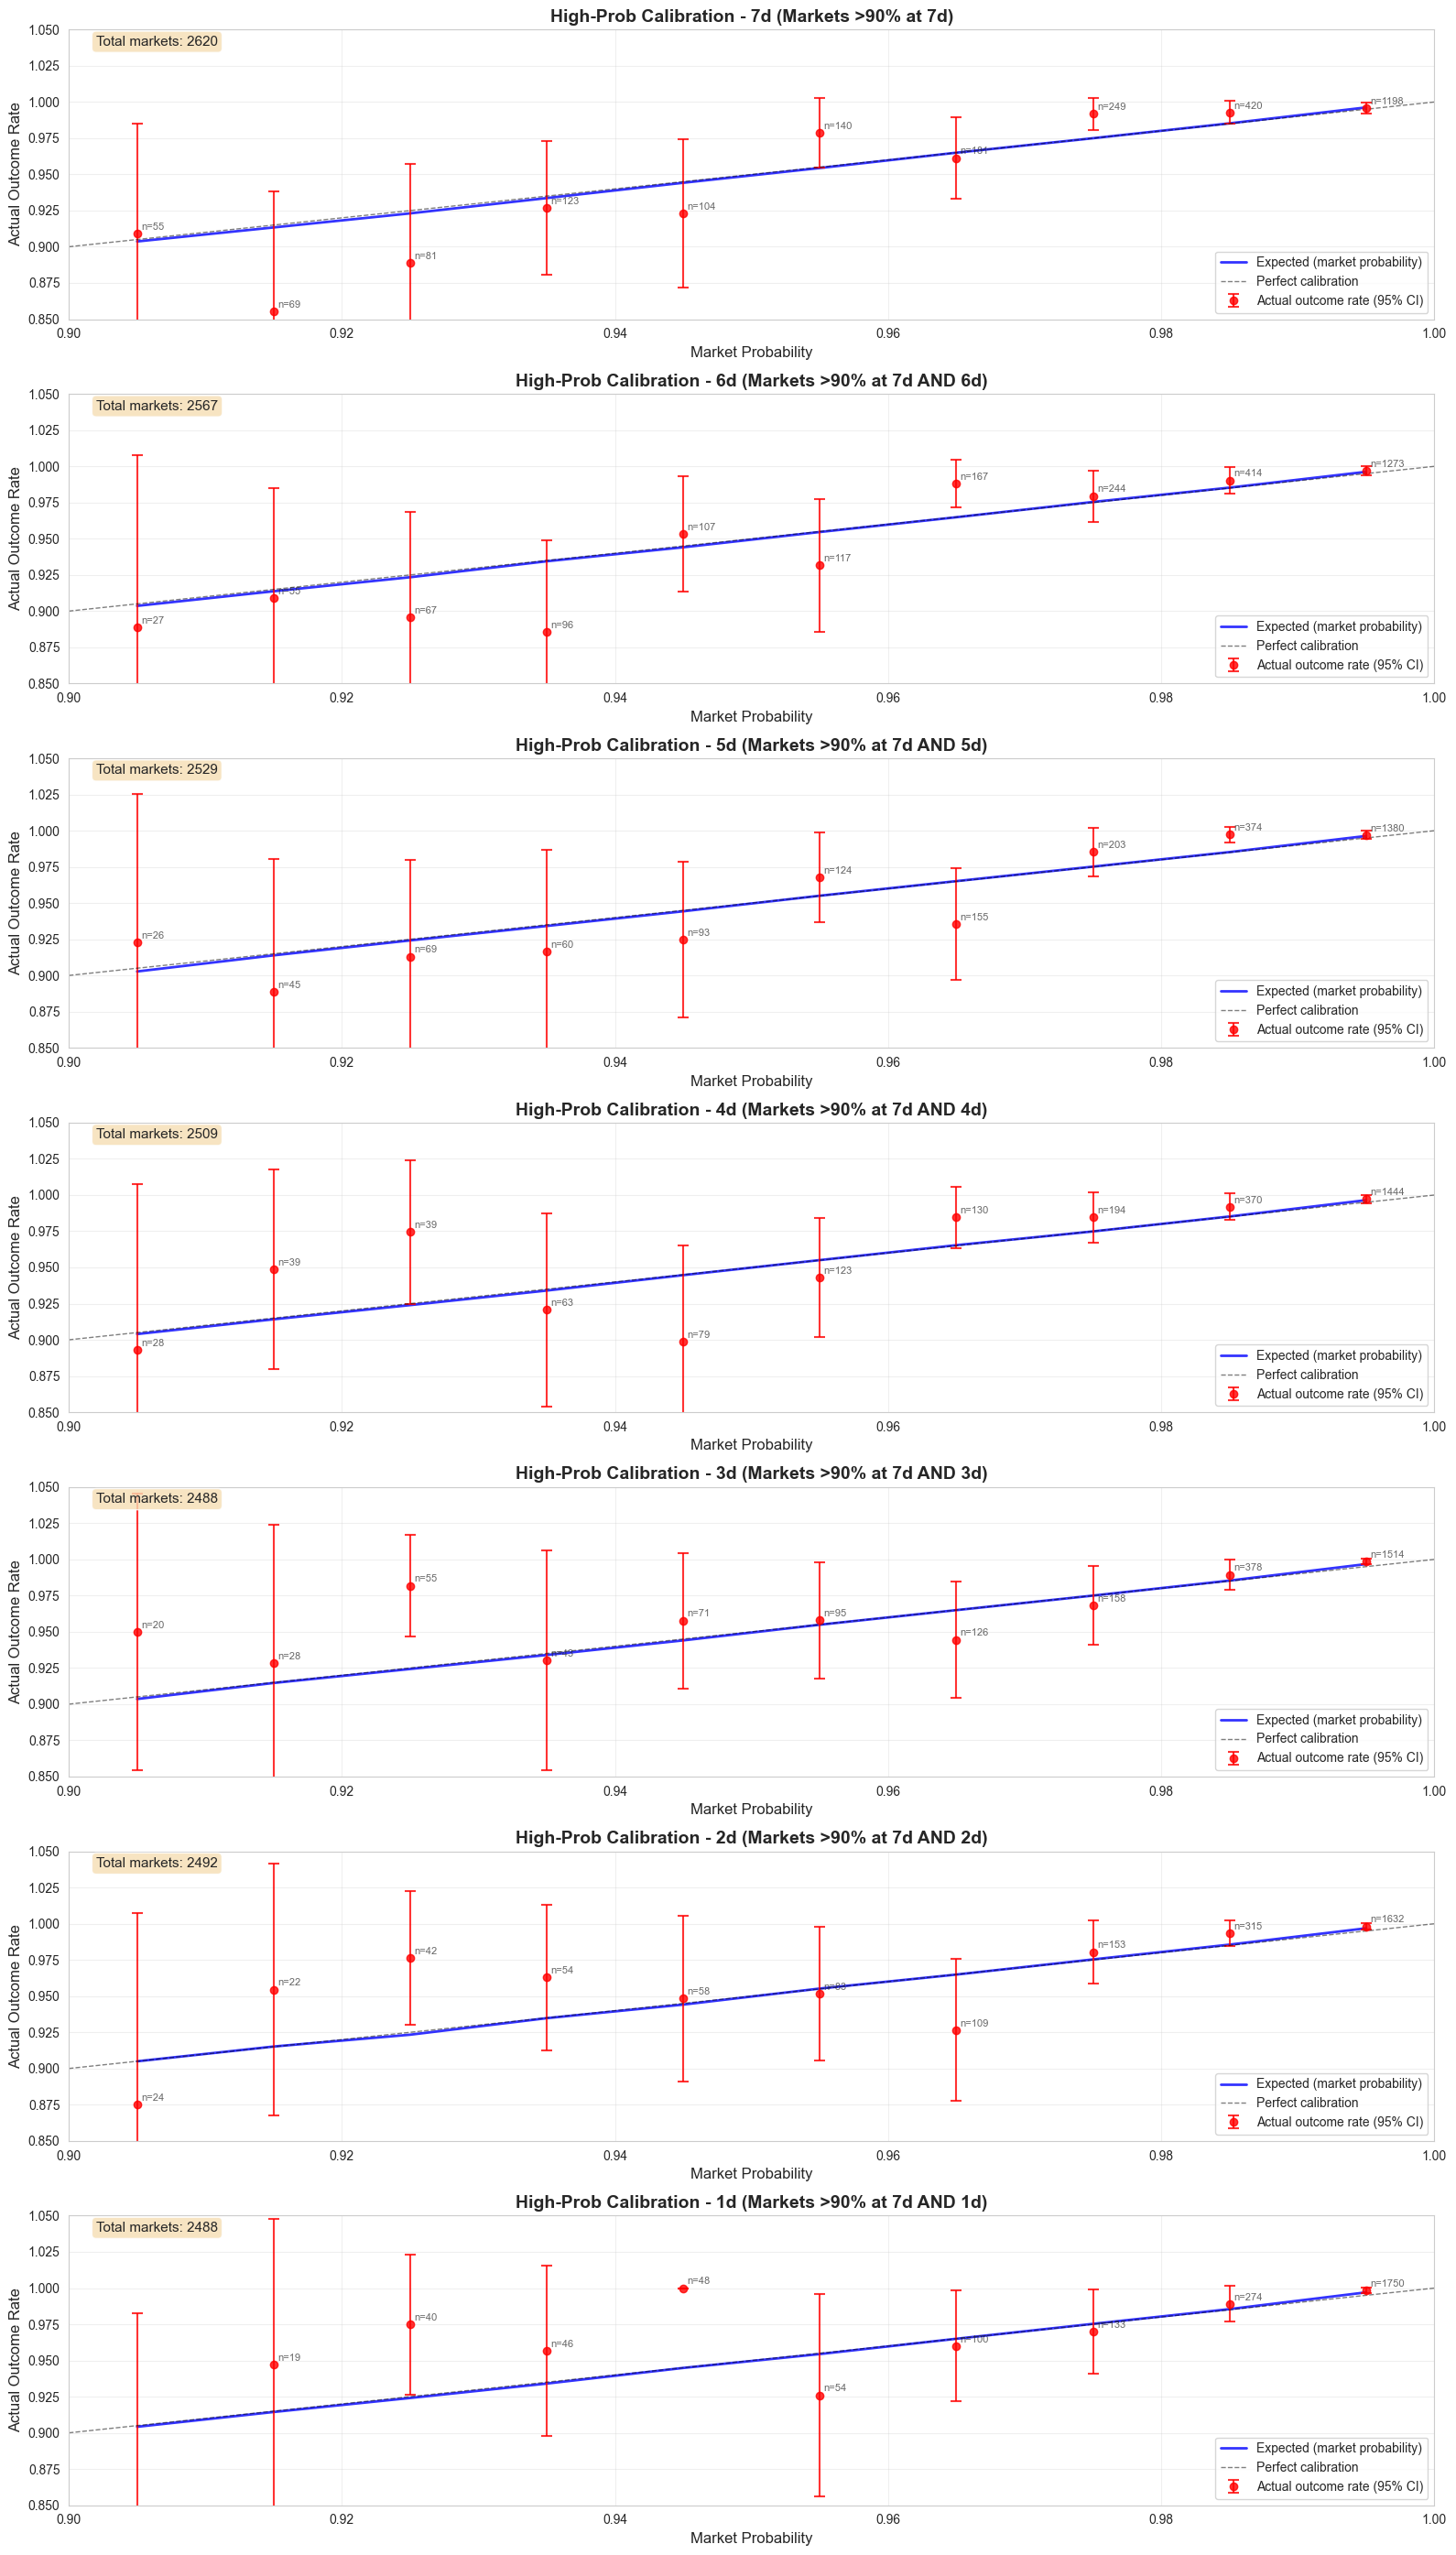

Expected Value Summary by Day (Markets >90%):
7d (Markets >90% at 7d):
  Expected Value: -0.0002 (-0.02%) | n=2620
6d (Markets >90% at 7d AND 6d):
  Expected Value: -0.0006 (-0.06%) | n=2567
5d (Markets >90% at 7d AND 5d):
  Expected Value: +0.0000 (+0.00%) | n=2529
4d (Markets >90% at 7d AND 4d):
  Expected Value: +0.0020 (+0.20%) | n=2509
3d (Markets >90% at 7d AND 3d):
  Expected Value: +0.0027 (+0.27%) | n=2488
2d (Markets >90% at 7d AND 2d):
  Expected Value: +0.0021 (+0.21%) | n=2492
1d (Markets >90% at 7d AND 1d):
  Expected Value: +0.0021 (+0.21%) | n=2488


In [8]:
# Cell 4: High-Probability Calibration Curves (90-100% in 1% intervals)
# Filter markets that were >90% at 7d AND >90% at each specific day

def calculate_high_prob_calibration_data(df, prob_col_current, prob_col_7d='probability7d', outcome_col='outcome_int'):
    """Calculate calibration data for 1% probability bands from 90% to 100%"""
    calibration_data = []
    
    # Create 1% bands from 90% to 100%
    bands_1pct = []
    for i in range(90, 100):  # 90-91, 91-92, ..., 99-100
        low = i / 100.0
        high = (i + 1) / 100.0
        bands_1pct.append((low, high, f"{i}-{i+1}%"))
    
    for low, high, label in bands_1pct:
        # Filter criteria:
        # 1. Market probability at current day is in this band
        # 2. Market was >90% at 7d out (except for 7d analysis where this is redundant)
        # 3. Market was >90% at current day
        # 4. Valid outcome data
        
        if prob_col_current == prob_col_7d:
            # For 7d analysis, only need current day filters
            mask = ((df[prob_col_current] >= low) & 
                   (df[prob_col_current] < high) & 
                   (df[prob_col_current] >= 0.90) &
                   (df[outcome_col].notna()))
        else:
            # For other days, need both 7d and current day >90% filters
            mask = ((df[prob_col_current] >= low) & 
                   (df[prob_col_current] < high) & 
                   (df[prob_col_7d] >= 0.90) &
                   (df[prob_col_current] >= 0.90) &
                   (df[prob_col_7d].notna()) &
                   (df[prob_col_current].notna()) &
                   (df[outcome_col].notna()))
        
        band_data = df[mask]
        
        if len(band_data) > 0:
            n = len(band_data)
            wins = band_data[outcome_col].sum()
            actual_rate = wins / n
            expected_rate = band_data[prob_col_current].mean()  # Average probability in band
            
            # Calculate 95% confidence interval for actual rate
            ci_low, ci_high = calculate_binomial_ci(n, actual_rate)
            
            calibration_data.append({
                'band': label,
                'low': low,
                'high': high,
                'midpoint': (low + high) / 2,
                'expected_rate': expected_rate,
                'actual_rate': actual_rate,
                'n': n,
                'wins': wins,
                'ci_low': ci_low,
                'ci_high': ci_high
            })
    
    return pd.DataFrame(calibration_data)

def calculate_expected_value(df, prob_col_current, prob_col_7d='probability7d', outcome_col='outcome_int'):
    """Calculate expected value for markets meeting the filtering criteria"""
    if prob_col_current == prob_col_7d:
        # For 7d analysis, only need current day filters
        mask = ((df[prob_col_current] >= 0.90) & 
               (df[prob_col_current].notna()) &
               (df[outcome_col].notna()))
    else:
        # For other days, need both 7d and current day >90% filters
        mask = ((df[prob_col_7d] >= 0.90) &
               (df[prob_col_current] >= 0.90) &
               (df[prob_col_7d].notna()) &
               (df[prob_col_current].notna()) &
               (df[outcome_col].notna()))
    
    filtered_data = df[mask]
    
    if len(filtered_data) == 0:
        return None, 0
    
    # Calculate actual returns for each market
    # If we invest $1 at price p, we get $1/p shares, worth $1/p if win, $0 if loss
    # Return = (1/p - 1) if win, -1 if loss
    actual_returns = []
    for _, row in filtered_data.iterrows():
        prob = row[prob_col_current]
        if row[outcome_col] == 1:  # Win
            ret = (1.0 / prob) - 1.0
        else:  # Loss
            ret = -1.0
        actual_returns.append(ret)
    
    avg_return = np.mean(actual_returns)
    n_markets = len(filtered_data)
    
    return avg_return, n_markets

# Filter to markets with complete data and outcomes
df_complete = df[df['outcome'].notna()].copy()

# Create figure with 7 rows, 1 column
fig, axes = plt.subplots(7, 1, figsize=(16, 28))

days = [7, 6, 5, 4, 3, 2, 1]

for idx, days_before in enumerate(days):
    ax = axes[idx]
    prob_col = f'probability{days_before}d'
    
    if prob_col in df_complete.columns:
        # Get calibration data for this day with high-probability filter
        cal_data = calculate_high_prob_calibration_data(df_complete, prob_col)
        
        if len(cal_data) > 0:
            # Plot expected line (blue)
            ax.plot(cal_data['midpoint'], cal_data['expected_rate'], 
                   'b-', linewidth=2, label='Expected (market probability)', alpha=0.8)
            
            # Plot actual outcomes (red dots with confidence intervals)
            ax.errorbar(cal_data['midpoint'], cal_data['actual_rate'],
                       yerr=[cal_data['actual_rate'] - cal_data['ci_low'], 
                             cal_data['ci_high'] - cal_data['actual_rate']],
                       fmt='ro', markersize=6, capsize=4, capthick=1.5,
                       label='Actual outcome rate (95% CI)', alpha=0.8)
            
            # Plot perfect calibration line
            ax.plot([0.90, 1.0], [0.90, 1.0], 'k--', alpha=0.5, linewidth=1, 
                   label='Perfect calibration')
            
            # Formatting
            ax.set_xlim(0.90, 1.0)
            ax.set_ylim(0.85, 1.05)
            ax.set_xlabel('Market Probability', fontsize=12)
            ax.set_ylabel('Actual Outcome Rate', fontsize=12)
            
            # Dynamic title based on filtering
            if days_before == 7:
                title = f'High-Prob Calibration - {days_before}d (Markets >90% at {days_before}d)'
            else:
                title = f'High-Prob Calibration - {days_before}d (Markets >90% at 7d AND {days_before}d)'
            ax.set_title(title, fontsize=14, fontweight='bold')
            
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)
            
            # Add sample sizes as text annotations (only for reasonable sample sizes)
            for _, row in cal_data.iterrows():
                if row['n'] >= 3:  # Lower threshold for 1% bands
                    ax.annotate(f"n={row['n']}", 
                               (row['midpoint'], row['actual_rate']),
                               xytext=(3, 3), textcoords='offset points',
                               fontsize=8, alpha=0.7)
            
            # Add total sample size to the plot
            total_n = cal_data['n'].sum()
            ax.text(0.02, 0.98, f'Total markets: {total_n}', 
                   transform=ax.transAxes, fontsize=11,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
        else:
            ax.text(0.5, 0.5, 'No high-probability data available', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
            if days_before == 7:
                title = f'{days_before}d - Markets >90% at {days_before}d'
            else:
                title = f'{days_before}d - Markets >90% at 7d AND {days_before}d'
            ax.set_title(title + ' - No Data')
            ax.set_xlim(0.90, 1.0)
            ax.set_ylim(0.85, 1.05)
    else:
        ax.text(0.5, 0.5, f'Column {prob_col} not found', transform=ax.transAxes,
               ha='center', va='center', fontsize=12)
        ax.set_title(f'{days_before}d - Column Not Found')
        ax.set_xlim(0.90, 1.0)
        ax.set_ylim(0.85, 1.05)

plt.tight_layout()
plt.show()

# Print expected value summary for each day
print("Expected Value Summary by Day (Markets >90%):")
print("=" * 60)
for days_before in days:
    prob_col = f'probability{days_before}d'
    if prob_col in df_complete.columns:
        expected_value, n_markets = calculate_expected_value(df_complete, prob_col)
        
        if expected_value is not None:
            if days_before == 7:
                filter_desc = f"Markets >90% at {days_before}d"
            else:
                filter_desc = f"Markets >90% at 7d AND {days_before}d"
                
            print(f"{days_before}d ({filter_desc}):")
            print(f"  Expected Value: {expected_value:+.4f} ({expected_value*100:+.2f}%) | n={n_markets}")
        else:
            print(f"{days_before}d: No data available")
    else:
        print(f"{days_before}d: Column not found")

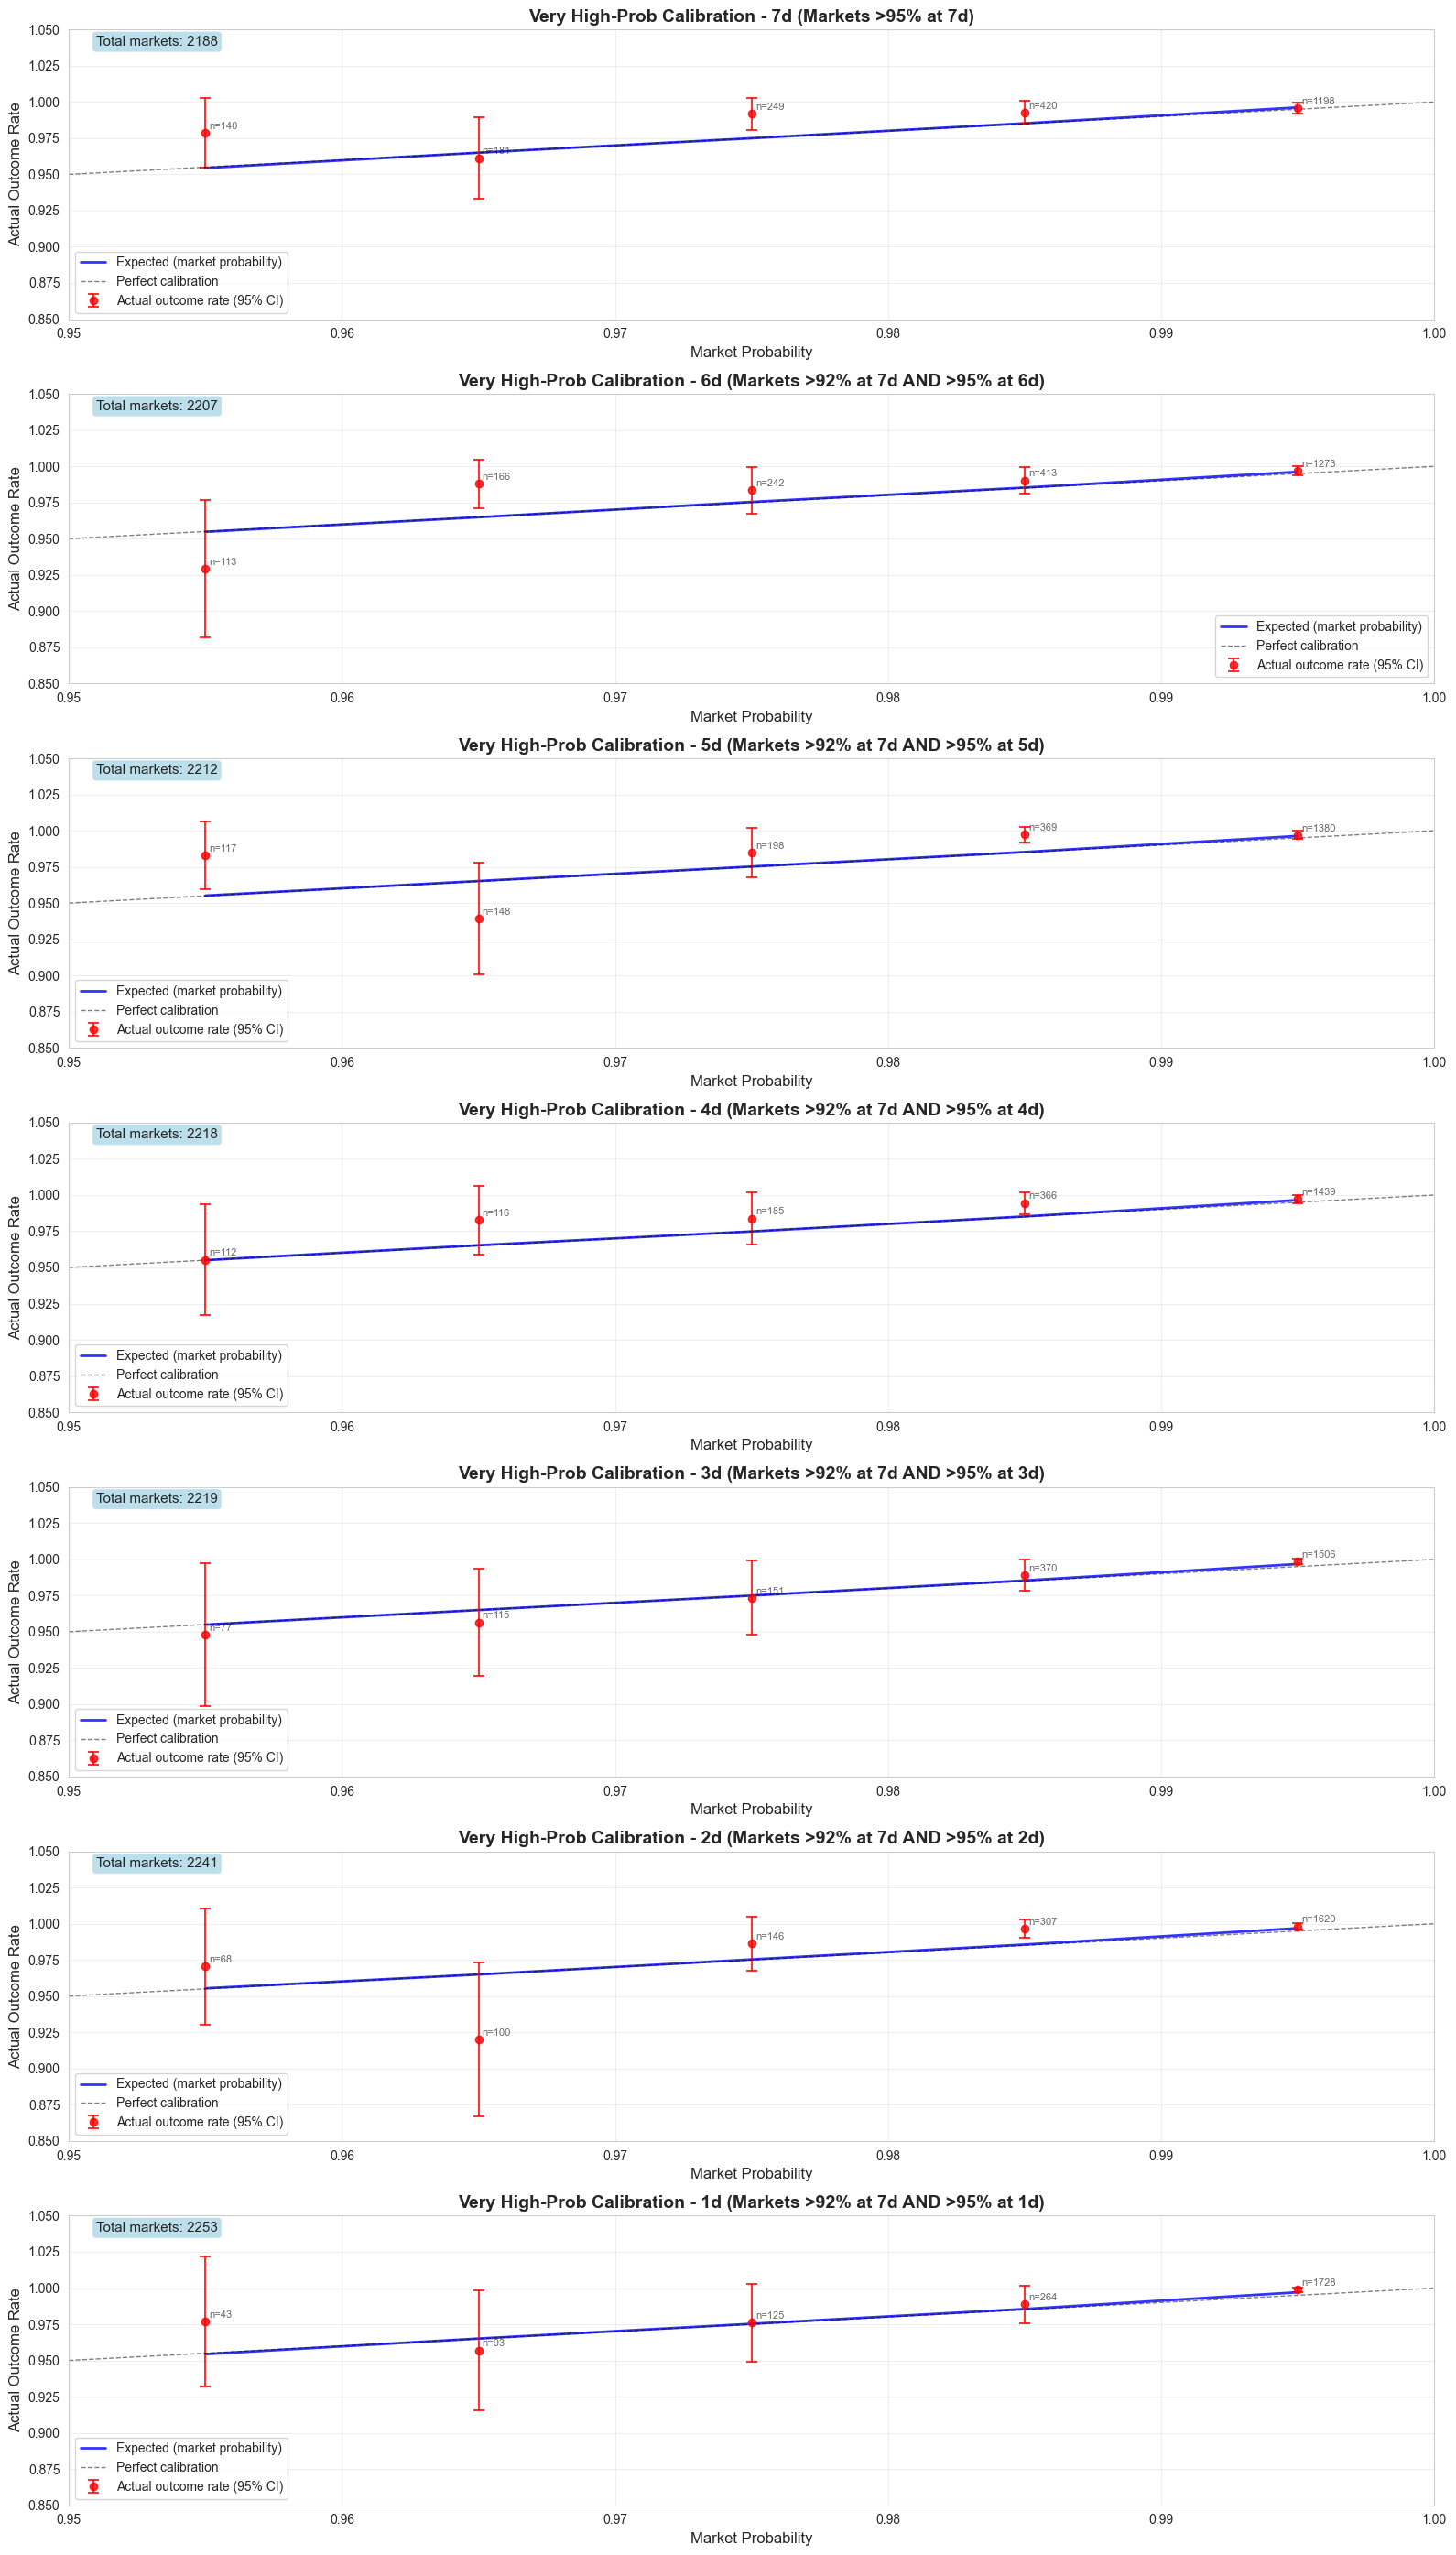

Expected Value Summary by Day (Very High Probability Markets):
7d (Markets >95% at 7d):
  Expected Value: +0.0045 (+0.45%) | n=2188
6d (Markets >92% at 7d AND >95% at 6d):
  Expected Value: +0.0027 (+0.27%) | n=2207
5d (Markets >92% at 7d AND >95% at 5d):
  Expected Value: +0.0031 (+0.31%) | n=2212
4d (Markets >92% at 7d AND >95% at 4d):
  Expected Value: +0.0038 (+0.38%) | n=2218
3d (Markets >92% at 7d AND >95% at 3d):
  Expected Value: +0.0011 (+0.11%) | n=2219
2d (Markets >92% at 7d AND >95% at 2d):
  Expected Value: +0.0016 (+0.16%) | n=2241
1d (Markets >92% at 7d AND >95% at 1d):
  Expected Value: +0.0019 (+0.19%) | n=2253


In [9]:
# Cell 5: Very High-Probability Calibration Curves (95-100% in 1% intervals)
# Filter markets that were >92% at 7d AND >95% at each specific day

def calculate_very_high_prob_calibration_data(df, prob_col_current, prob_col_7d='probability7d', outcome_col='outcome_int'):
    """Calculate calibration data for 1% probability bands from 95% to 100%"""
    calibration_data = []
    
    # Create 1% bands from 95% to 100%
    bands_1pct = []
    for i in range(95, 100):  # 95-96, 96-97, ..., 99-100
        low = i / 100.0
        high = (i + 1) / 100.0
        bands_1pct.append((low, high, f"{i}-{i+1}%"))
    
    for low, high, label in bands_1pct:
        # Filter criteria:
        # 1. Market probability at current day is in this band
        # 2. Market was >92% at 7d out (except for 7d analysis where we use >95%)
        # 3. Market was >95% at current day
        # 4. Valid outcome data
        
        if prob_col_current == prob_col_7d:
            # For 7d analysis, use 95% threshold
            mask = ((df[prob_col_current] >= low) & 
                   (df[prob_col_current] < high) & 
                   (df[prob_col_current] >= 0.95) &
                   (df[outcome_col].notna()))
        else:
            # For other days, need 92% at 7d and 95% at current day
            mask = ((df[prob_col_current] >= low) & 
                   (df[prob_col_current] < high) & 
                   (df[prob_col_7d] >= 0.92) &
                   (df[prob_col_current] >= 0.95) &
                   (df[prob_col_7d].notna()) &
                   (df[prob_col_current].notna()) &
                   (df[outcome_col].notna()))
        
        band_data = df[mask]
        
        if len(band_data) > 0:
            n = len(band_data)
            wins = band_data[outcome_col].sum()
            actual_rate = wins / n
            expected_rate = band_data[prob_col_current].mean()  # Average probability in band
            
            # Calculate 95% confidence interval for actual rate
            ci_low, ci_high = calculate_binomial_ci(n, actual_rate)
            
            calibration_data.append({
                'band': label,
                'low': low,
                'high': high,
                'midpoint': (low + high) / 2,
                'expected_rate': expected_rate,
                'actual_rate': actual_rate,
                'n': n,
                'wins': wins,
                'ci_low': ci_low,
                'ci_high': ci_high
            })
    
    return pd.DataFrame(calibration_data)

def calculate_very_high_expected_value(df, prob_col_current, prob_col_7d='probability7d', outcome_col='outcome_int'):
    """Calculate expected value for very high probability markets"""
    if prob_col_current == prob_col_7d:
        # For 7d analysis, use 95% threshold
        mask = ((df[prob_col_current] >= 0.95) & 
               (df[prob_col_current].notna()) &
               (df[outcome_col].notna()))
    else:
        # For other days, need 92% at 7d and 95% at current day
        mask = ((df[prob_col_7d] >= 0.92) &
               (df[prob_col_current] >= 0.95) &
               (df[prob_col_7d].notna()) &
               (df[prob_col_current].notna()) &
               (df[outcome_col].notna()))
    
    filtered_data = df[mask]
    
    if len(filtered_data) == 0:
        return None, 0
    
    # Calculate actual returns for each market
    # If we invest $1 at price p, we get $1/p shares, worth $1/p if win, $0 if loss
    # Return = (1/p - 1) if win, -1 if loss
    actual_returns = []
    for _, row in filtered_data.iterrows():
        prob = row[prob_col_current]
        if row[outcome_col] == 1:  # Win
            ret = (1.0 / prob) - 1.0
        else:  # Loss
            ret = -1.0
        actual_returns.append(ret)
    
    avg_return = np.mean(actual_returns)
    n_markets = len(filtered_data)
    
    return avg_return, n_markets

# Filter to markets with complete data and outcomes
df_complete = df[df['outcome'].notna()].copy()

# Create figure with 7 rows, 1 column
fig, axes = plt.subplots(7, 1, figsize=(16, 28))

days = [7, 6, 5, 4, 3, 2, 1]

for idx, days_before in enumerate(days):
    ax = axes[idx]
    prob_col = f'probability{days_before}d'
    
    if prob_col in df_complete.columns:
        # Get calibration data for this day with very high-probability filter
        cal_data = calculate_very_high_prob_calibration_data(df_complete, prob_col)
        
        if len(cal_data) > 0:
            # Plot expected line (blue)
            ax.plot(cal_data['midpoint'], cal_data['expected_rate'], 
                   'b-', linewidth=2, label='Expected (market probability)', alpha=0.8)
            
            # Plot actual outcomes (red dots with confidence intervals)
            ax.errorbar(cal_data['midpoint'], cal_data['actual_rate'],
                       yerr=[cal_data['actual_rate'] - cal_data['ci_low'], 
                             cal_data['ci_high'] - cal_data['actual_rate']],
                       fmt='ro', markersize=6, capsize=4, capthick=1.5,
                       label='Actual outcome rate (95% CI)', alpha=0.8)
            
            # Plot perfect calibration line
            ax.plot([0.95, 1.0], [0.95, 1.0], 'k--', alpha=0.5, linewidth=1, 
                   label='Perfect calibration')
            
            # Formatting
            ax.set_xlim(0.95, 1.0)
            ax.set_ylim(0.85, 1.05)
            ax.set_xlabel('Market Probability', fontsize=12)
            ax.set_ylabel('Actual Outcome Rate', fontsize=12)
            
            # Dynamic title based on filtering
            if days_before == 7:
                title = f'Very High-Prob Calibration - {days_before}d (Markets >95% at {days_before}d)'
            else:
                title = f'Very High-Prob Calibration - {days_before}d (Markets >92% at 7d AND >95% at {days_before}d)'
            ax.set_title(title, fontsize=14, fontweight='bold')
            
            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=10)
            
            # Add sample sizes as text annotations (only for reasonable sample sizes)
            for _, row in cal_data.iterrows():
                if row['n'] >= 3:  # Lower threshold for 1% bands
                    ax.annotate(f"n={row['n']}", 
                               (row['midpoint'], row['actual_rate']),
                               xytext=(3, 3), textcoords='offset points',
                               fontsize=8, alpha=0.7)
            
            # Add total sample size to the plot
            total_n = cal_data['n'].sum()
            ax.text(0.02, 0.98, f'Total markets: {total_n}', 
                   transform=ax.transAxes, fontsize=11,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
            
        else:
            ax.text(0.5, 0.5, 'No very high-probability data available', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12)
            if days_before == 7:
                title = f'{days_before}d - Markets >95% at {days_before}d'
            else:
                title = f'{days_before}d - Markets >92% at 7d AND >95% at {days_before}d'
            ax.set_title(title + ' - No Data')
            ax.set_xlim(0.95, 1.0)
            ax.set_ylim(0.85, 1.05)
    else:
        ax.text(0.5, 0.5, f'Column {prob_col} not found', transform=ax.transAxes,
               ha='center', va='center', fontsize=12)
        ax.set_title(f'{days_before}d - Column Not Found')
        ax.set_xlim(0.95, 1.0)
        ax.set_ylim(0.85, 1.05)

plt.tight_layout()
plt.show()

# Print expected value summary for each day
print("Expected Value Summary by Day (Very High Probability Markets):")
print("=" * 70)
for days_before in days:
    prob_col = f'probability{days_before}d'
    if prob_col in df_complete.columns:
        expected_value, n_markets = calculate_very_high_expected_value(df_complete, prob_col)
        
        if expected_value is not None:
            if days_before == 7:
                filter_desc = f"Markets >95% at {days_before}d"
            else:
                filter_desc = f"Markets >92% at 7d AND >95% at {days_before}d"
                
            print(f"{days_before}d ({filter_desc}):")
            print(f"  Expected Value: {expected_value:+.4f} ({expected_value*100:+.2f}%) | n={n_markets}")
        else:
            print(f"{days_before}d: No data available")
    else:
        print(f"{days_before}d: Column not found")